# Problem Statement

1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [ ]:
ls


In [1]:
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# All Functions for this algorithm

## conevrting categorical data to numeric 

In [2]:
def data_proces(data):
    saldataX=data.iloc[:,0:-1]
    saldataY=data.iloc[:,-1]
    from sklearn.preprocessing import LabelEncoder
    X=pd.get_dummies(saldataX,drop_first=True)
    lb=LabelEncoder()
    y=lb.fit_transform(saldataY)
    Y=pd.Series(y)
    final_data=pd.concat([X,Y],axis=1)
    final_data.rename(columns={0:'y'},inplace=True)
    final_data.iloc[:,-1]
    return final_data;

## Function -Train Test Method

In [3]:
def train_test(data):
    from sklearn.model_selection import train_test_split # Import train_test_split function
    X=data.iloc[:,0:-1]
    y=data.iloc[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
    return  X_train,X_test,y_train,y_test;
    

##  Function -Data is imbalnced so we will upsampling using ADASYN

In [4]:
def upscaling_ADASYN(x_train,x_test,y_train,y_test):
    from imblearn.over_sampling import ADASYN
    col=x_train.columns
    ad=ADASYN(random_state=0)

    up_sampX,up_sampY=ad.fit_resample(x_train,y_train)
    up_sampX=pd.DataFrame(data=up_sampX,columns=col)
    up_sampY=pd.DataFrame(data=up_sampY,columns=['y'])
    new_final_data=pd.concat([up_sampX,up_sampY],axis=1)
    return new_final_data;

## Function - PCA



In [5]:
def PCA(data,n):
    from sklearn.decomposition import PCA
    pca=PCA(n)
    pca_sal=pca.fit_transform(data)
    pca.n_components_
    pca_sal=pd.DataFrame(pca_sal)
    return  pca_sal;

In [6]:
#load the data 
salary_train=pd.read_csv("SalaryData_Train(1).csv")

In [7]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
salary_train.rename(columns={"workclass":'w_class','education':'edu','educationno':'edu_no','maritalstatus':'m_status','occupation':'occup',
                         'relationship':'reln','capitalgain':'c_gain','capitalloss':'c_loss','hoursperweek':'hrpweek'},inplace=True)

## applying PPS



In [9]:
import ppscore as pps
corr_matrix=pps.matrix(salary_train)
corr_matrix_s=corr_matrix[corr_matrix['y']=='Salary']
corr_matrix_s.sort_values('ppscore',ascending=False,ignore_index=True)



,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Salary,Salary,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,c_gain,Salary,2.953948e-01,classification,True,weighted F1,0.643127,0.748545,DecisionTreeClassifier()
2,edu,Salary,2.366993e-01,classification,True,weighted F1,0.643127,0.727598,DecisionTreeClassifier()
3,edu_no,Salary,2.366993e-01,classification,True,weighted F1,0.643127,0.727598,DecisionTreeClassifier()
4,c_loss,Salary,1.271312e-01,classification,True,weighted F1,0.643127,0.688496,DecisionTreeClassifier()
5,reln,Salary,1.174597e-01,classification,True,weighted F1,0.643127,0.685045,DecisionTreeClassifier()
6,w_class,Salary,9.274449e-02,classification,True,weighted F1,0.643127,0.676225,DecisionTreeClassifier()
7,age,Salary,2.752510e-02,classification,True,weighted F1,0.643127,0.652950,DecisionTreeClassifier()
8,hrpweek,Salary,2.080733e-02,classification,True,weighted F1,0.643127,0.650552,DecisionTreeClassifier()
9,native,Salary,5.812138e-03,classification,True,weighted F1,0.643127,0.645201,DecisionTreeClassifier()


In [10]:
#with help of PPS score we can see that native is really not helpfull inpredicting y so we can drop that 
salary_train.drop('native',axis=1,inplace=True)

In [11]:
salary_train.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [12]:
salary_train.m_status.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: m_status, dtype: int64

In [13]:
salary_train.edu.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: edu, dtype: int64

In [14]:
salary_train.w_class.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: w_class, dtype: int64

In [15]:
#checking for null values 
salary_train.isnull().sum()

age         0
w_class     0
edu         0
edu_no      0
m_status    0
occup       0
reln        0
race        0
sex         0
c_gain      0
c_loss      0
hrpweek     0
Salary      0
dtype: int64

In [16]:
#salary_train=pd.get_dummies(salary_train,drop_first=True)

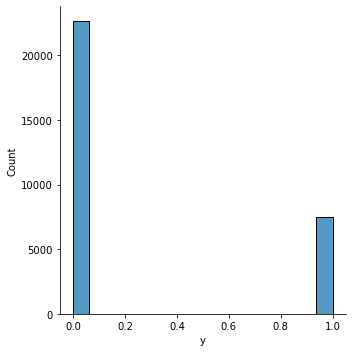

In [17]:
#sepearting X and Y
f_data=data_proces(salary_train)
sns.displot(data=f_data['y'],kind='hist')
plt.show()

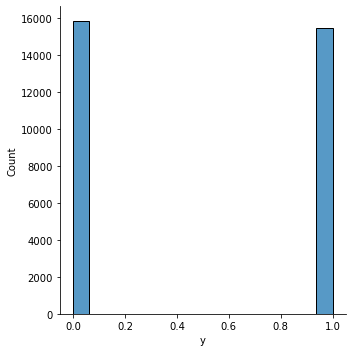

In [18]:
# Data is imbalnaced
a,b,c,d=train_test(f_data)
new_final_data=upscaling_ADASYN(a,b,c,d)
sns.displot(data=new_final_data['y'],kind='hist')
X_train,X_test,y_train,y_test=train_test(new_final_data)

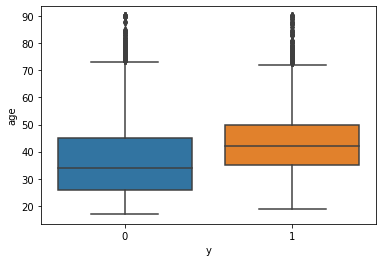

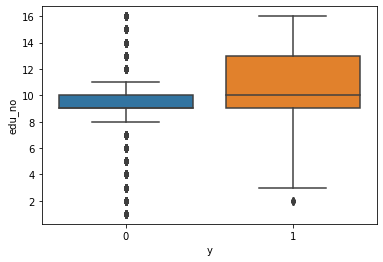

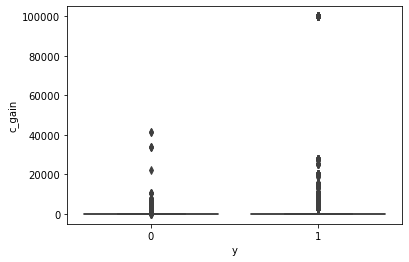

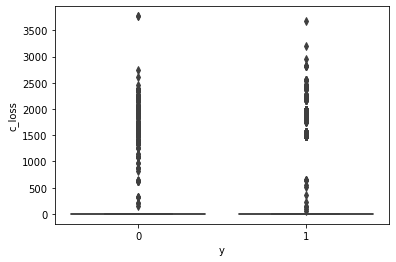

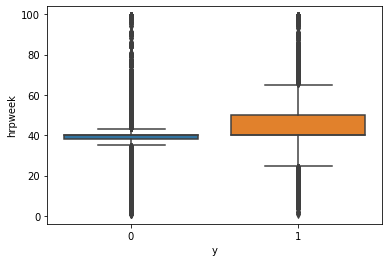

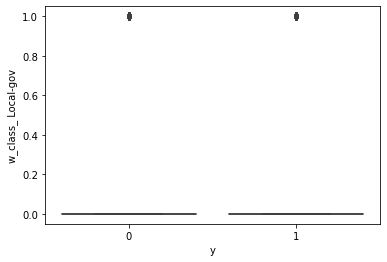

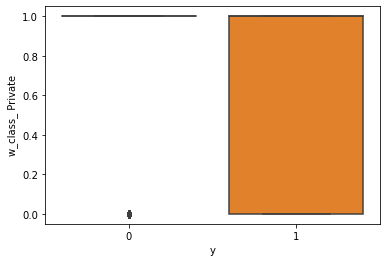

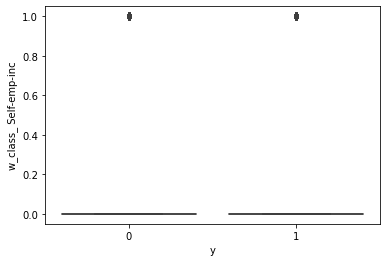

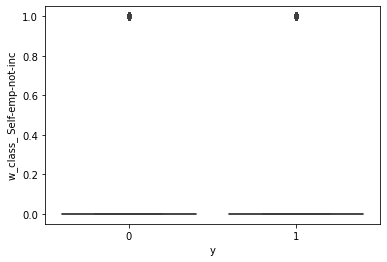

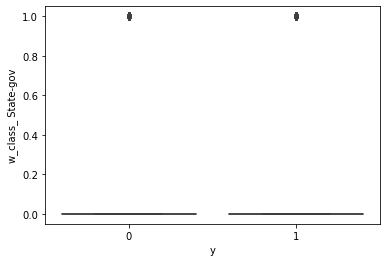

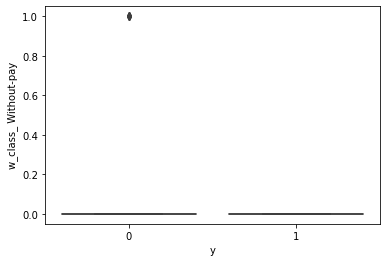

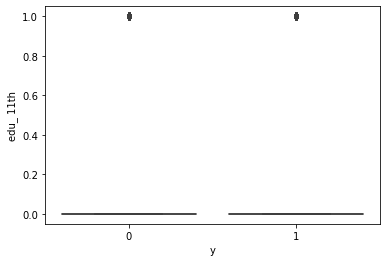

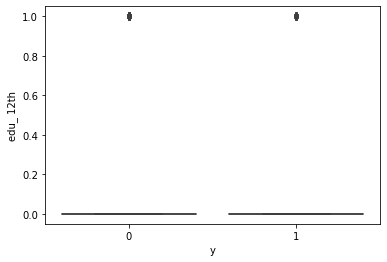

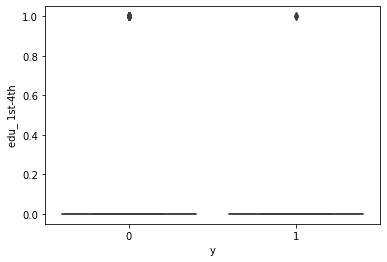

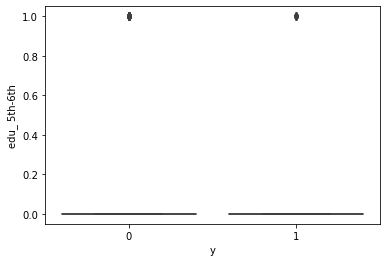

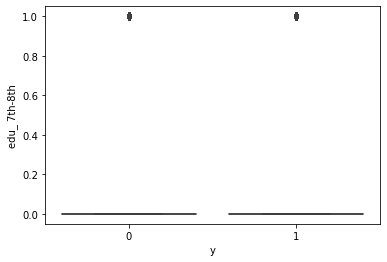

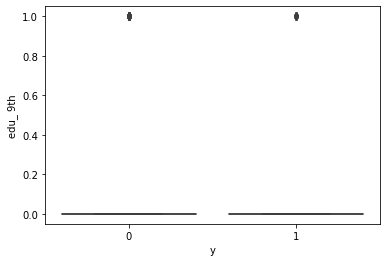

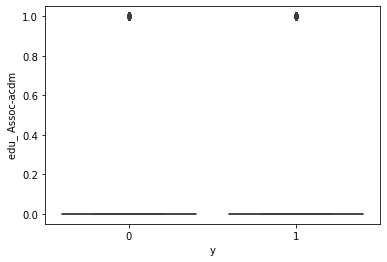

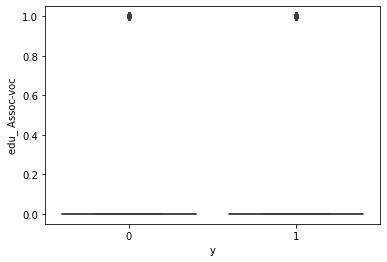

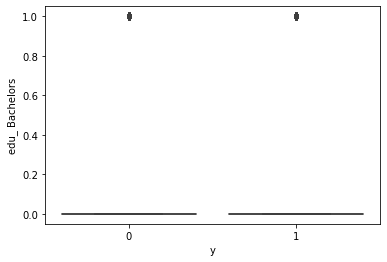

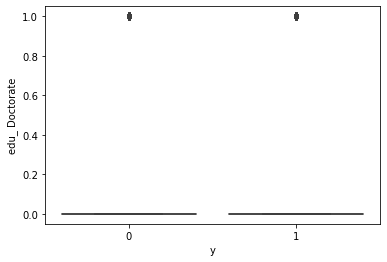

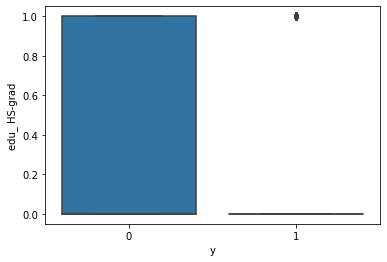

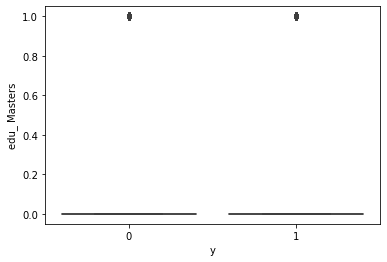

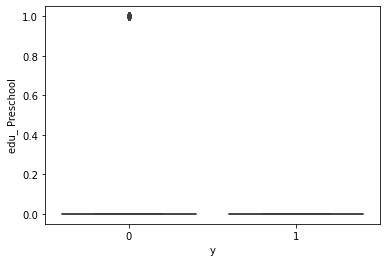

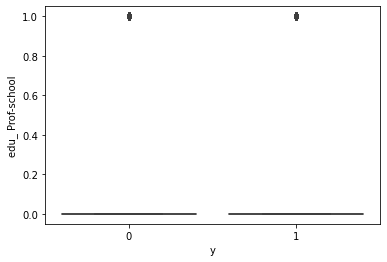

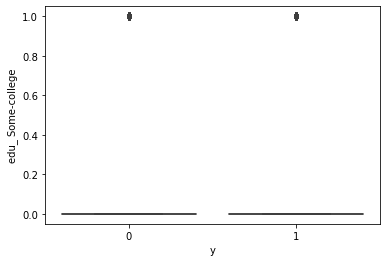

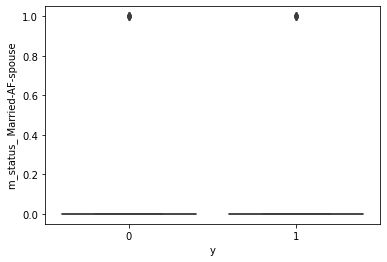

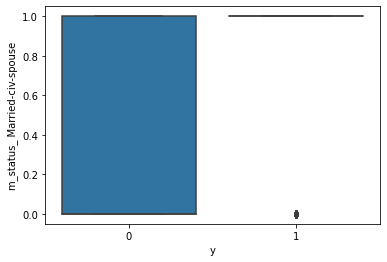

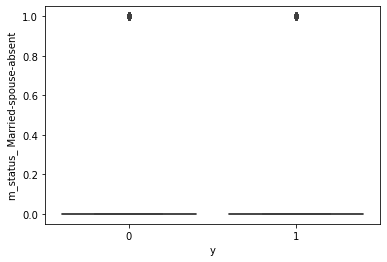

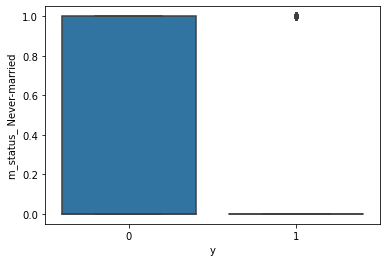

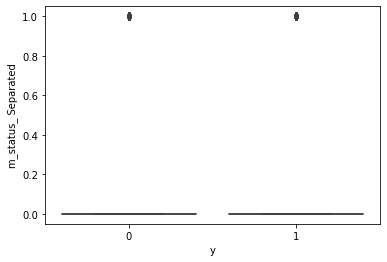

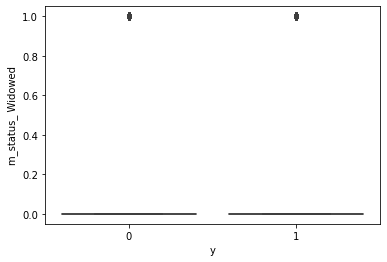

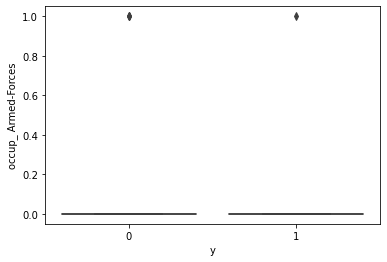

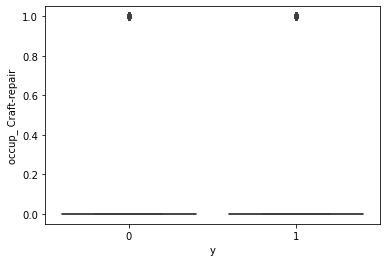

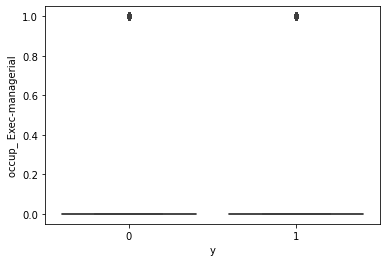

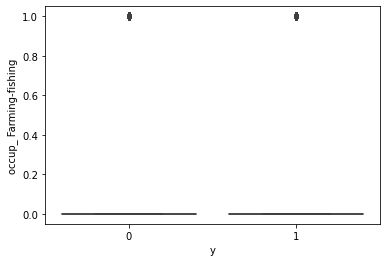

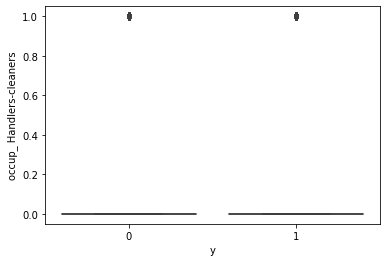

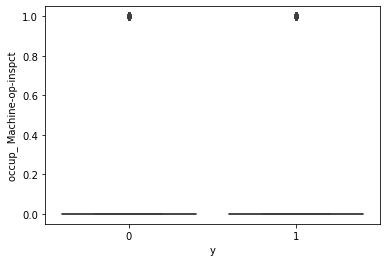

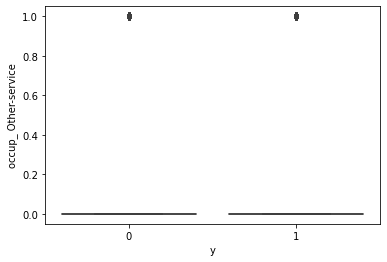

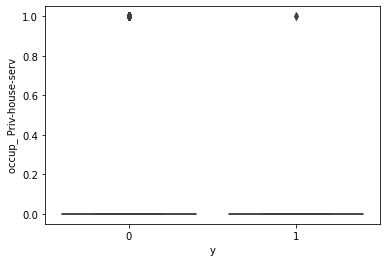

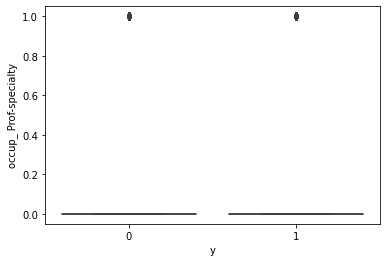

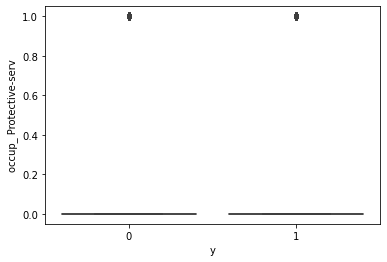

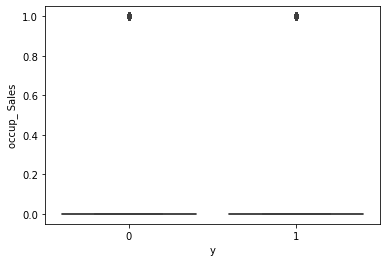

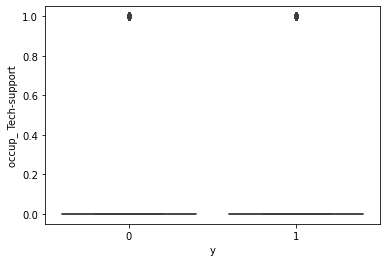

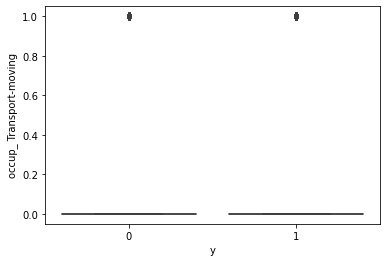

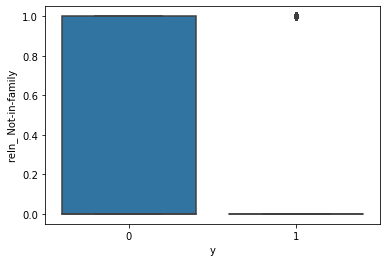

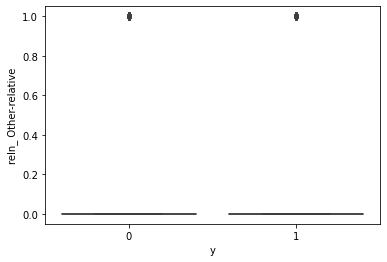

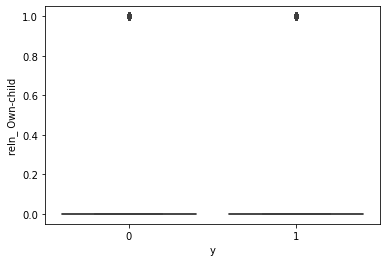

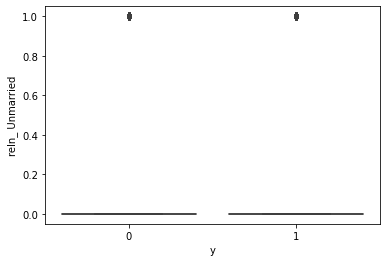

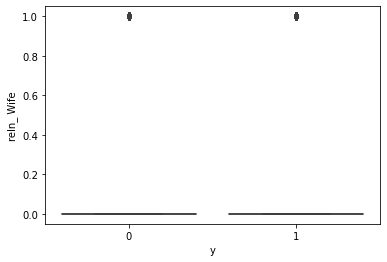

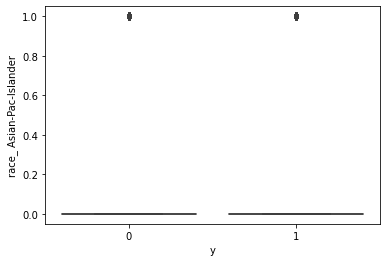

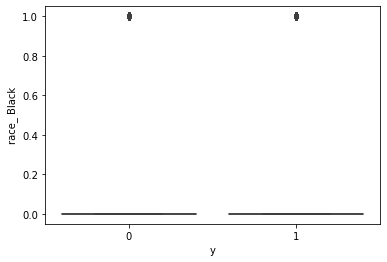

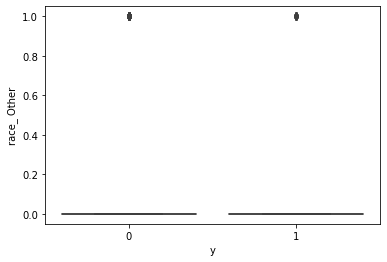

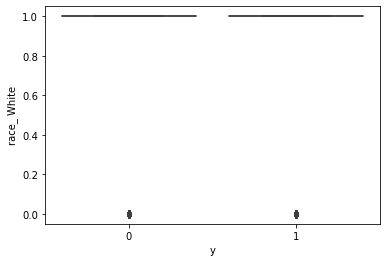

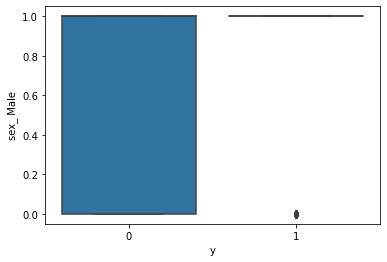

In [19]:
for i in new_final_data.columns[:-1]:
    sns.boxplot(new_final_data['y'],new_final_data[i])
    plt.show()

# Building a model 

In [22]:
clf = SVC(C= 4, gamma = 0.001,kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred)

Accuracy = 85.44145129677743


array([[ 8716,  2376],
       [  818, 10029]])

In [24]:
ls


Classification model using SVM for salary.ipynb
Classify Fire size by SVM.ipynb
Problem_statement(salary_data).txt
SalaryData_Test(1).csv
SalaryData_Train(1).csv
forest fires.txt
forestfires.csv


## With testing data

In [25]:
#load the data 
salary_test=pd.read_csv("SalaryData_Test(1).csv")

In [26]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [27]:
salary_test.rename(columns={"workclass":'w_class','education':'edu','educationno':'edu_no','maritalstatus':'m_status','occupation':'occup',
                         'relationship':'reln','capitalgain':'c_gain','capitalloss':'c_loss','hoursperweek':'hrpweek'},inplace=True)

In [30]:
salary_test.drop('native',axis=1,inplace=True)

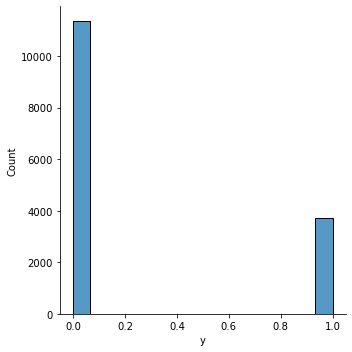

In [31]:
#sepearting X and Y
f_data=data_proces(salary_test)
sns.displot(data=f_data['y'],kind='hist')
plt.show()

In [33]:
x_train,x_test,Y_train,Y_test=train_test(f_data)

In [34]:
clf = SVC(C= 4, gamma = 0.001,kernel="rbf")
clf.fit(x_train, Y_train)
Y_pred = clf.predict(x_train)
acc = accuracy_score(Y_train, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_train, Y_pred)

Accuracy = 86.47315499905142


array([[7704,  271],
       [1155, 1412]])